# Implied volatity prediction 

In [58]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data 

In [59]:
!ls ../data/

spots_iv_index_spx_ai_daily.xlsx   spots_iv_index_sx5e_ai_weekly.xlsx
spots_iv_index_spx_ai_weekly.xlsx  spx_daily.xlsx
spots_iv_index_sx5e_ai_daily.xlsx  sx5e_daily.xlsx


### spots_iv_index_spx_ai_daily

In [60]:
import sys, os 

p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)
    
sys.path  

['/Users/rekahalmai/PycharmProjects/implied_vol_prediction/notebooks ',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python37.zip',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7/site-packages',
 '/Library/Python/3.7/site-packages',
 '/Library/Python/3.7/site-packages/IPython/extensions',
 '/Users/rekahalmai/.ipython',
 '/Users/rekahalmai/PycharmProjects']

In [63]:
from implied_vol_prediction.src.data import open_and_transform_csv2

sx5e_daily = open_and_transform_csv2(r'../data/sx5e_daily.xlsx')

In [64]:
sx5e_daily.isnull().sum()

Dates                    0
Spot t                   0
Spot t-1                 0
Volatility               0
Duration                 0
Strike                   0
Implied_vol              0
Change_in_implied_vol    0
dtype: int64

In [65]:
pd.unique(sx5e_daily.Duration.values), pd.unique(sx5e_daily.Strike.values)

(array(['6M', '1Y', '18M', '2Y', '3Y'], dtype=object),
 array([ 40,  60,  80,  90, 100, 110, 120]))

## EDA with spots_iv_index_spx - daily 

In [70]:
strikes = list(np.unique(sx5e_daily.Strike.values))
durations = ['6M','1Y','18M','2Y','3Y']

strikes, durations

([40, 60, 80, 90, 100, 110, 120], ['6M', '1Y', '18M', '2Y', '3Y'])

Strike = 40, Duration = 6M


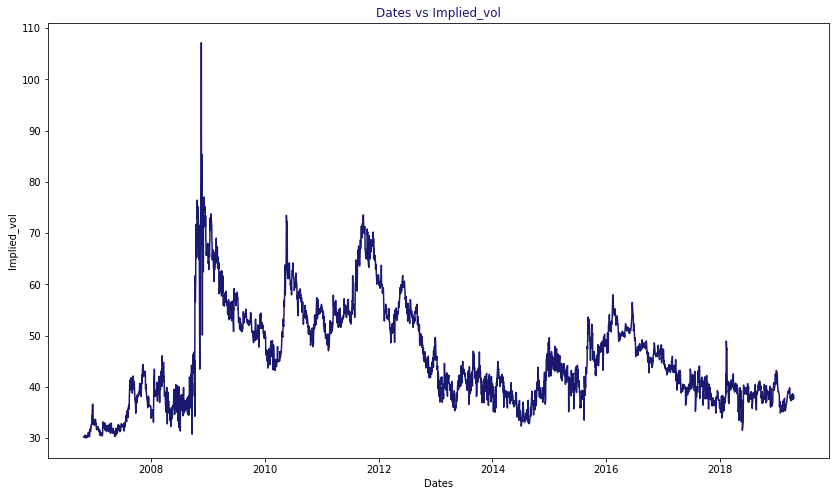

Strike = 40, Duration = 1Y


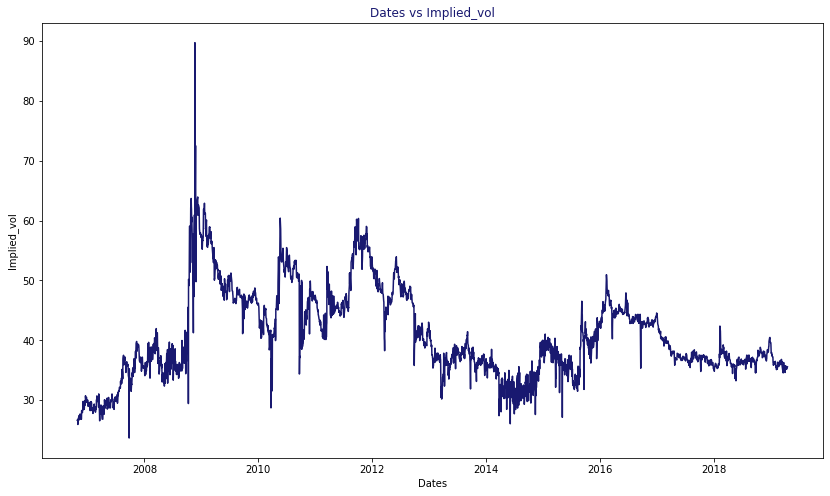

Strike = 40, Duration = 18M


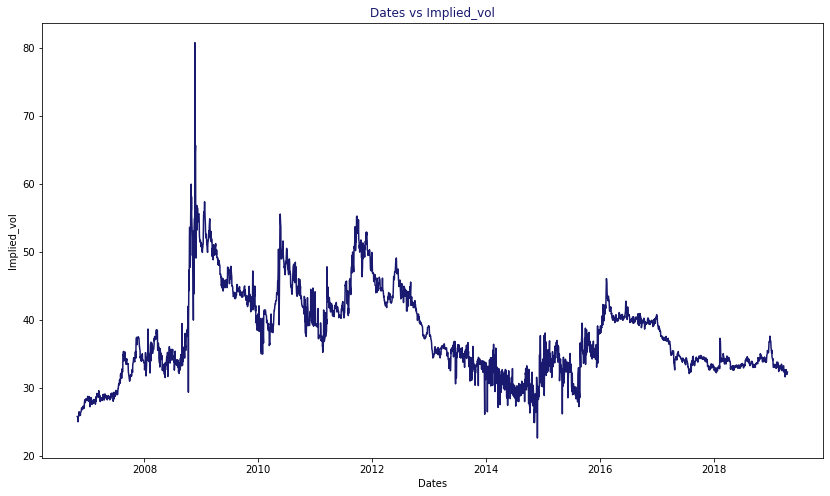

Strike = 40, Duration = 2Y


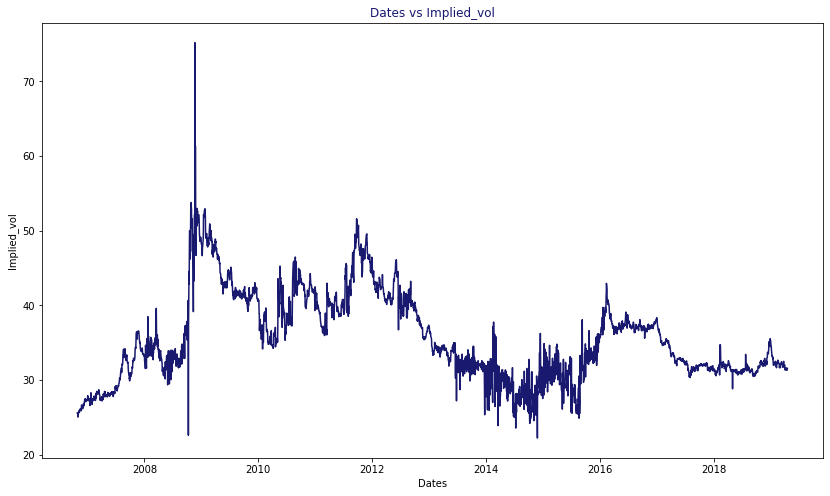

Strike = 40, Duration = 3Y


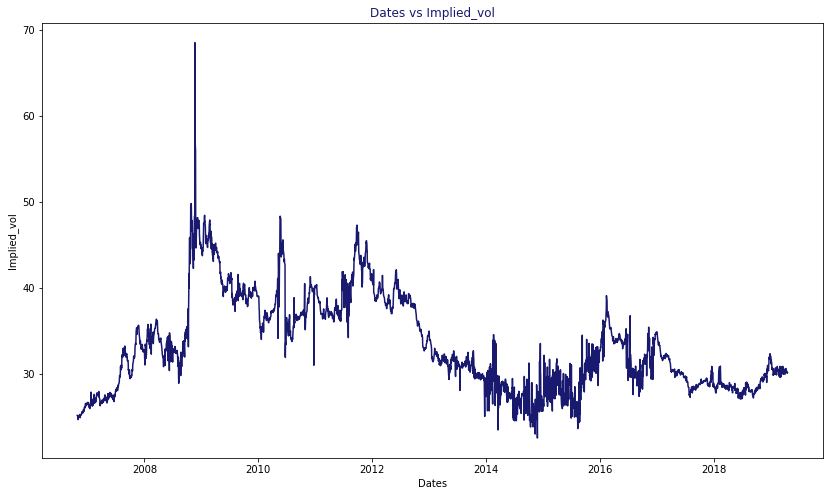

Strike = 60, Duration = 6M


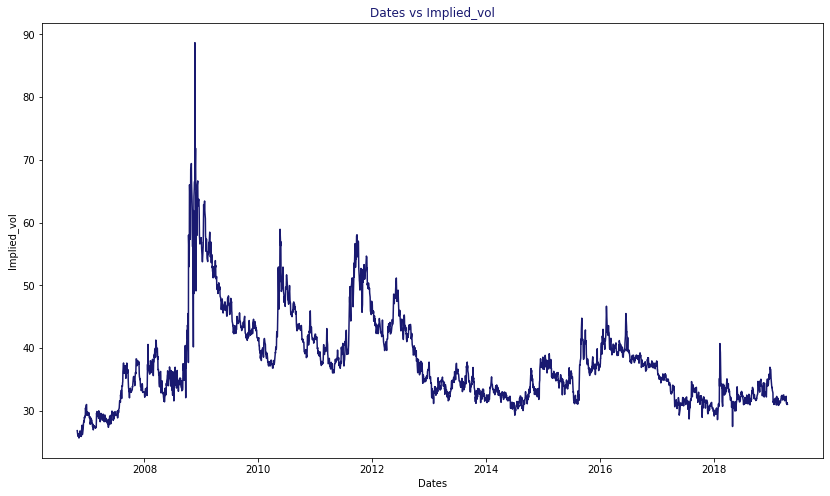

Strike = 60, Duration = 1Y


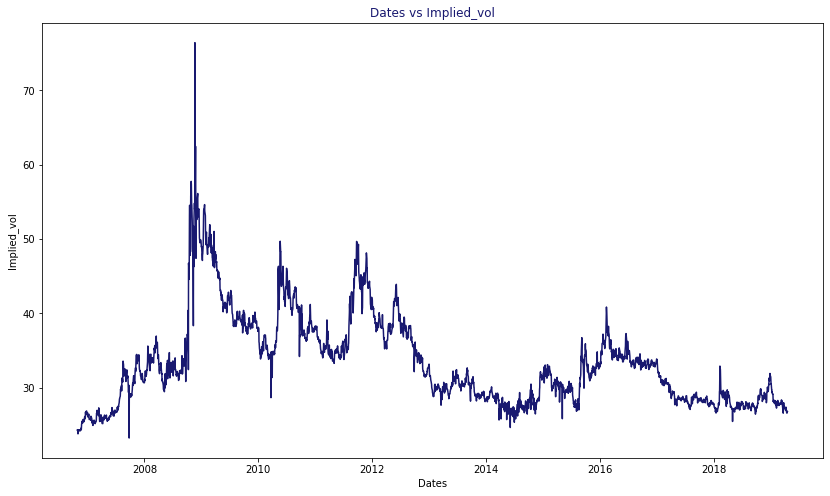

Strike = 60, Duration = 18M


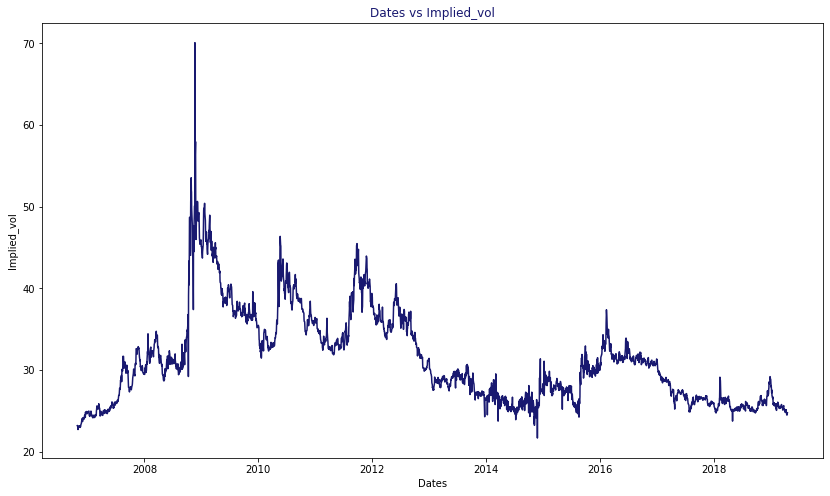

Strike = 60, Duration = 2Y


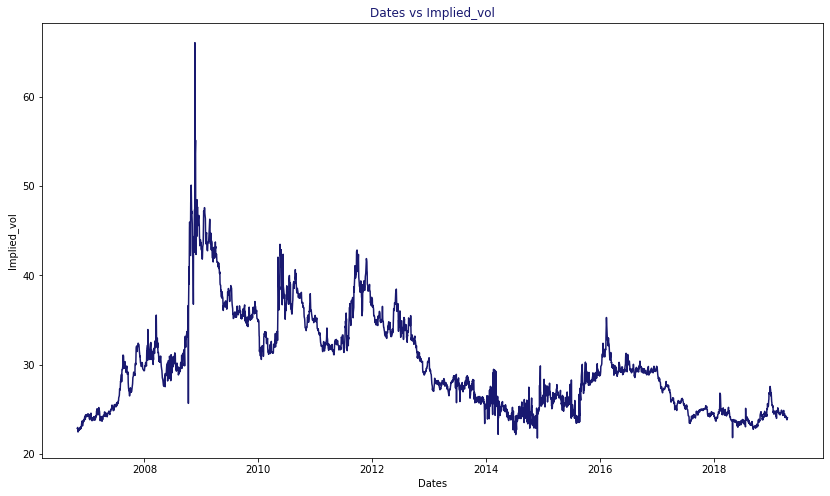

Strike = 60, Duration = 3Y


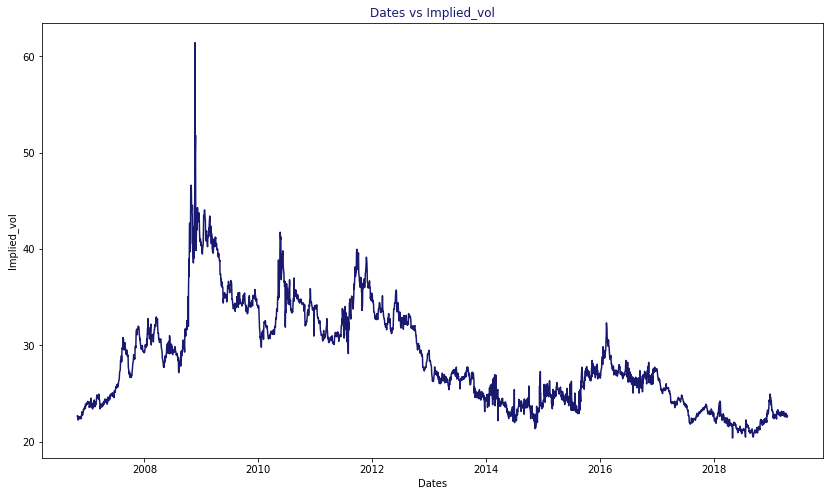

Strike = 80, Duration = 6M


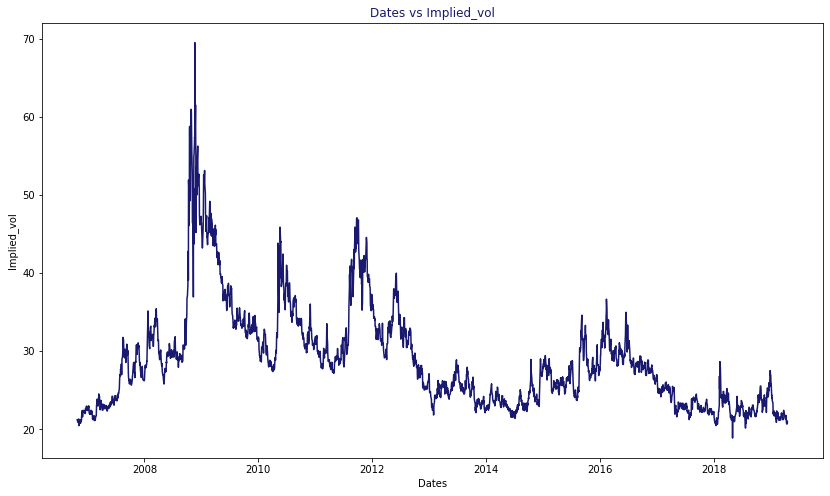

Strike = 80, Duration = 1Y


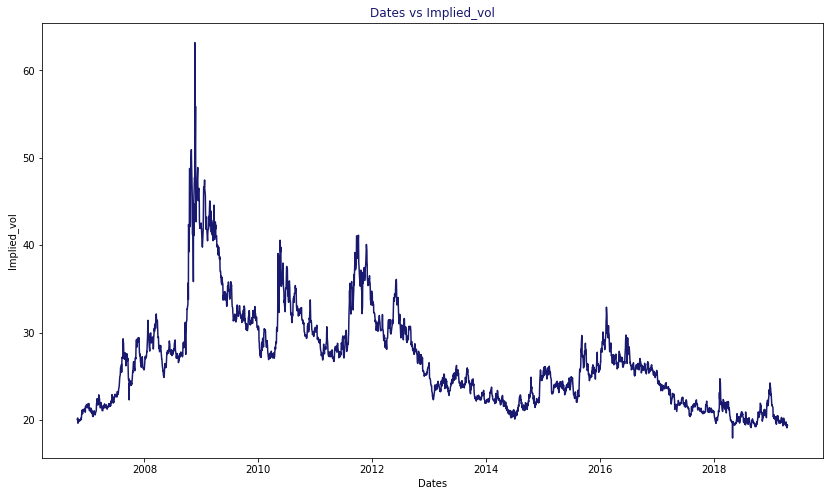

Strike = 80, Duration = 18M


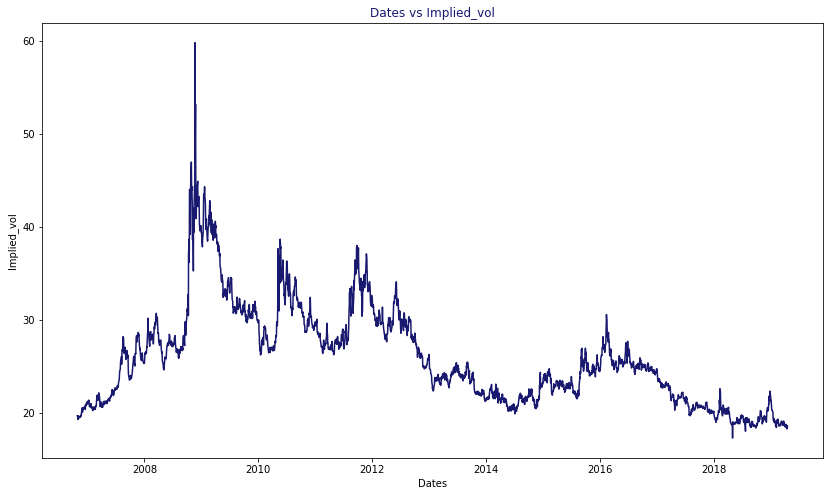

Strike = 80, Duration = 2Y


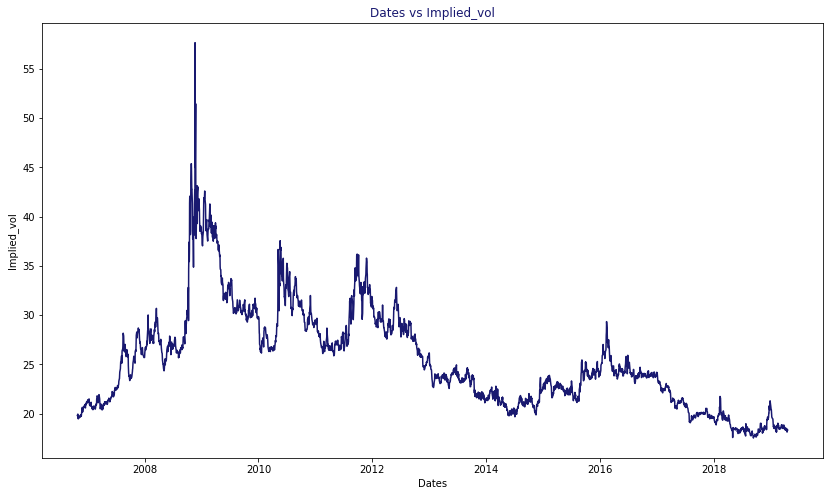

Strike = 80, Duration = 3Y


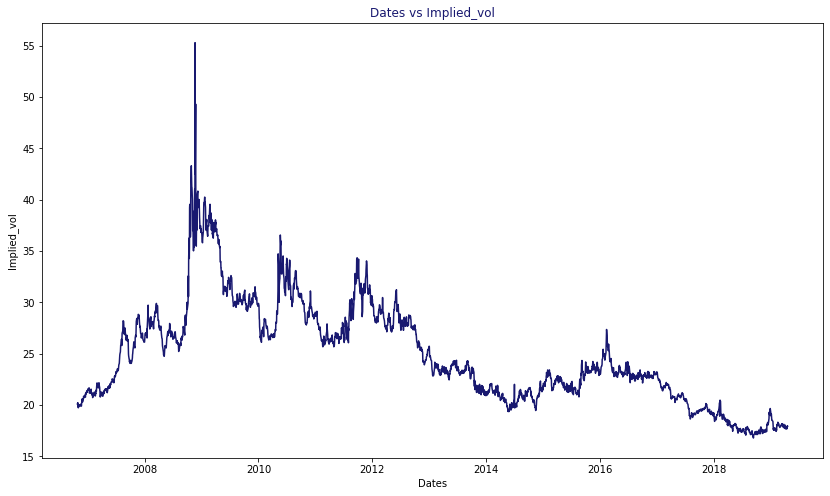

Strike = 90, Duration = 6M


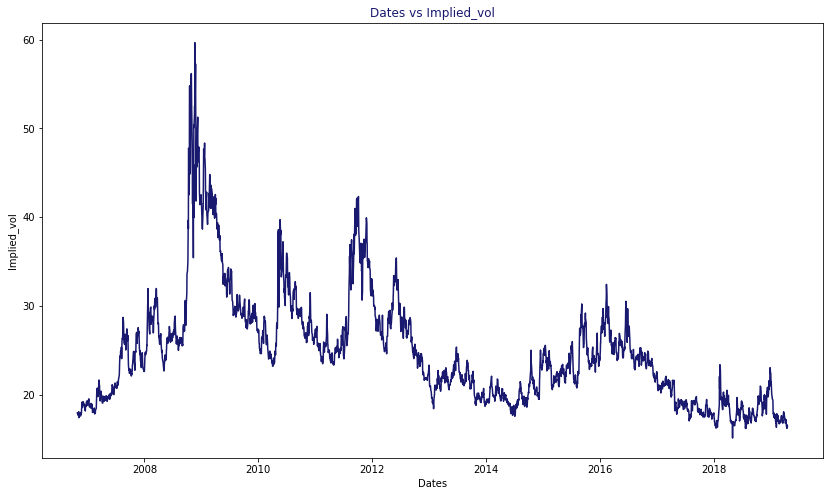

Strike = 90, Duration = 1Y


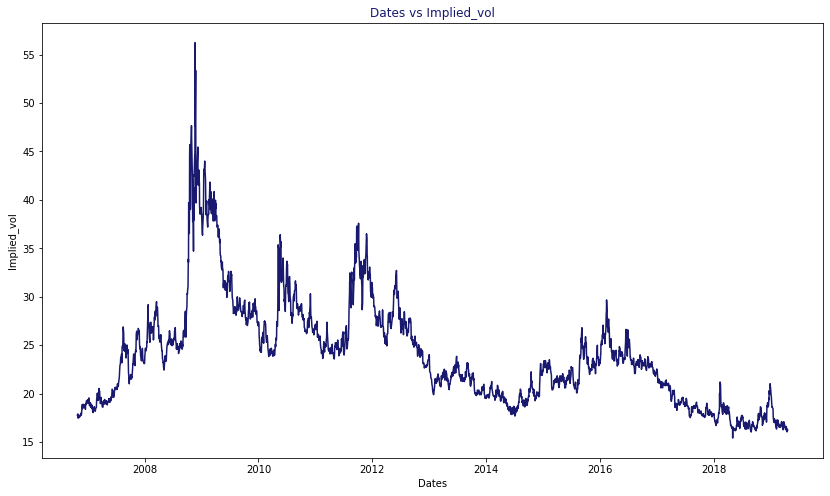

Strike = 90, Duration = 18M


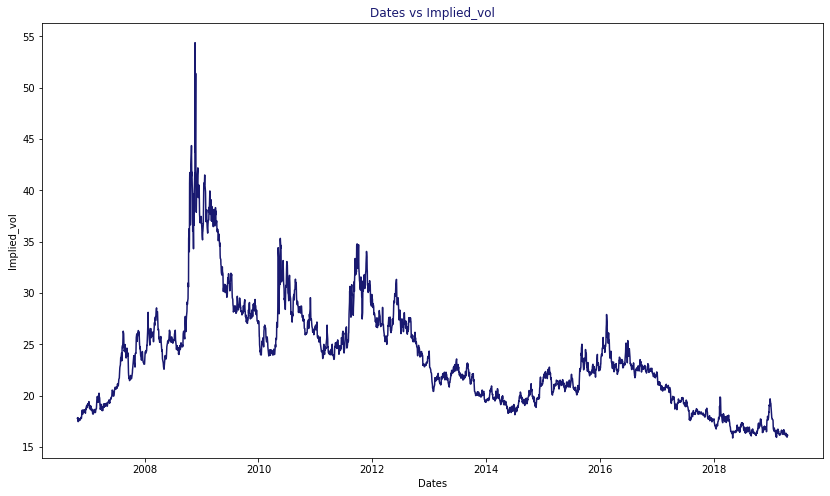

Strike = 90, Duration = 2Y


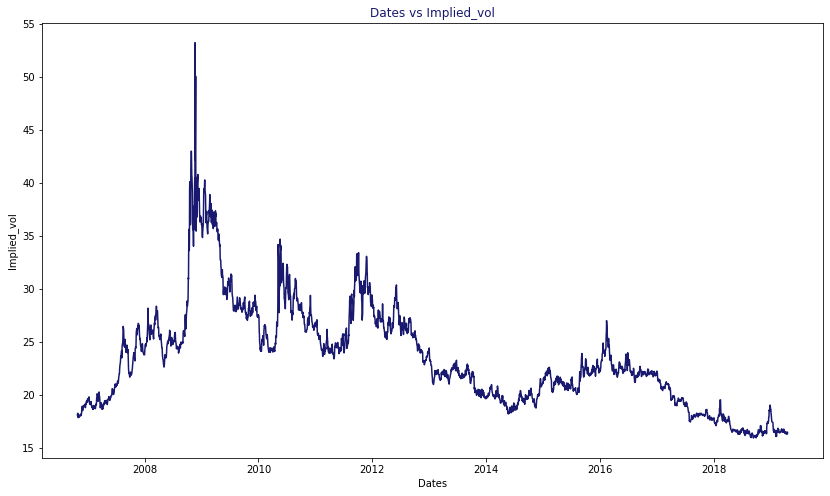

Strike = 90, Duration = 3Y


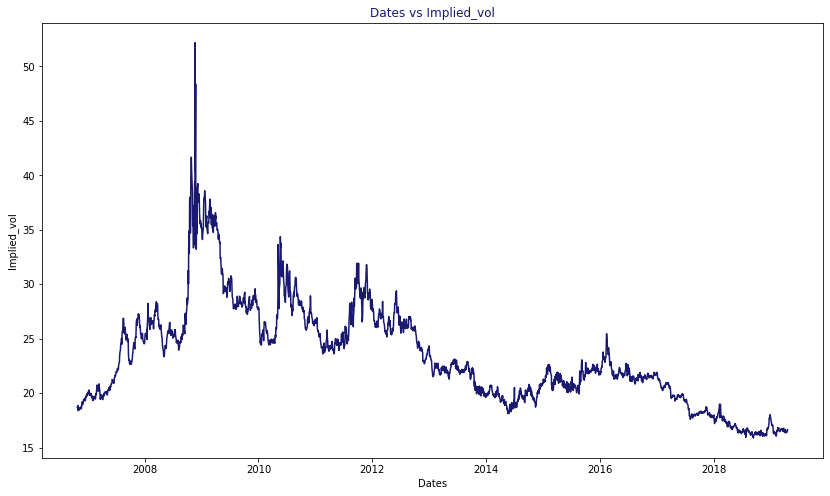

Strike = 100, Duration = 6M


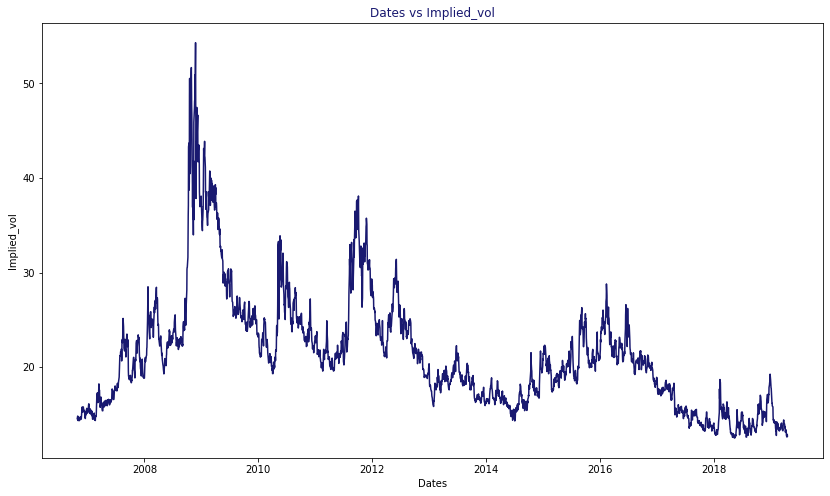

Strike = 100, Duration = 1Y


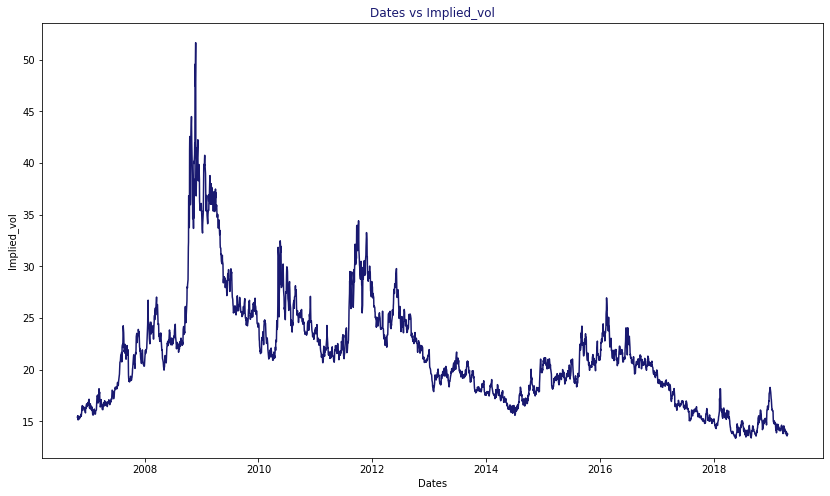

Strike = 100, Duration = 18M


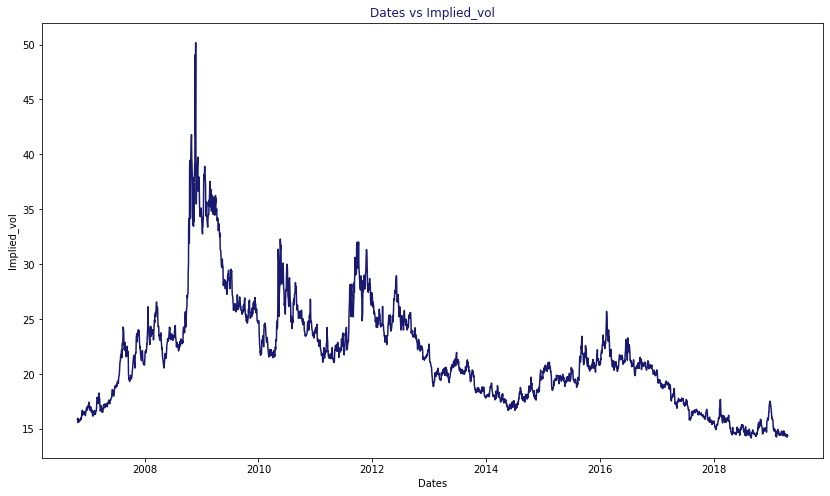

Strike = 100, Duration = 2Y


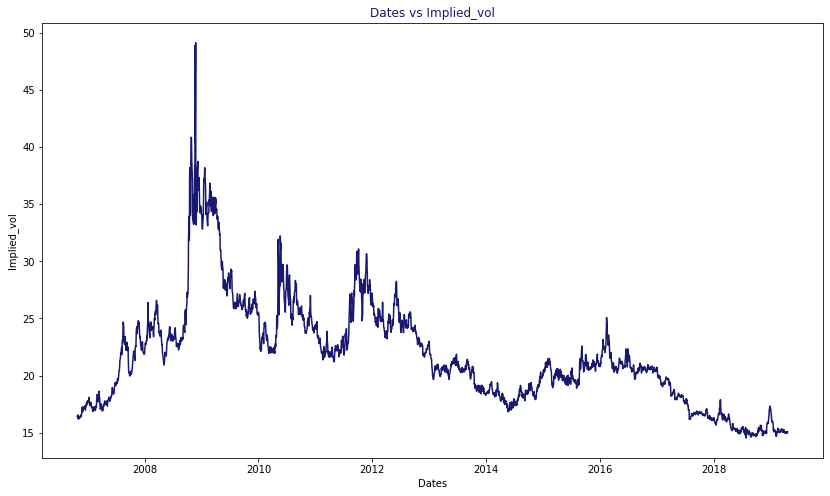

Strike = 100, Duration = 3Y


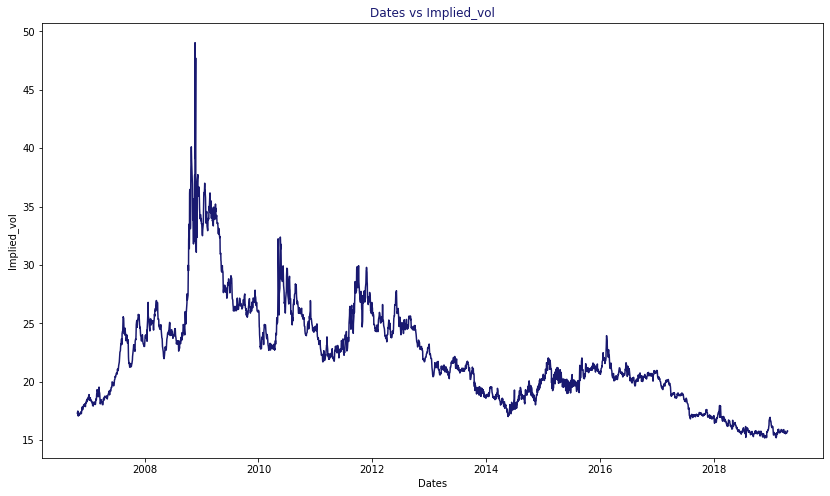

Strike = 110, Duration = 6M


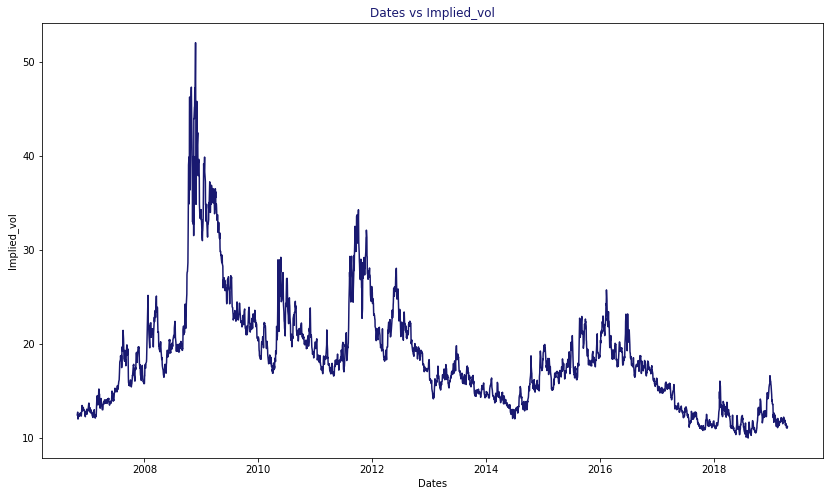

Strike = 110, Duration = 1Y


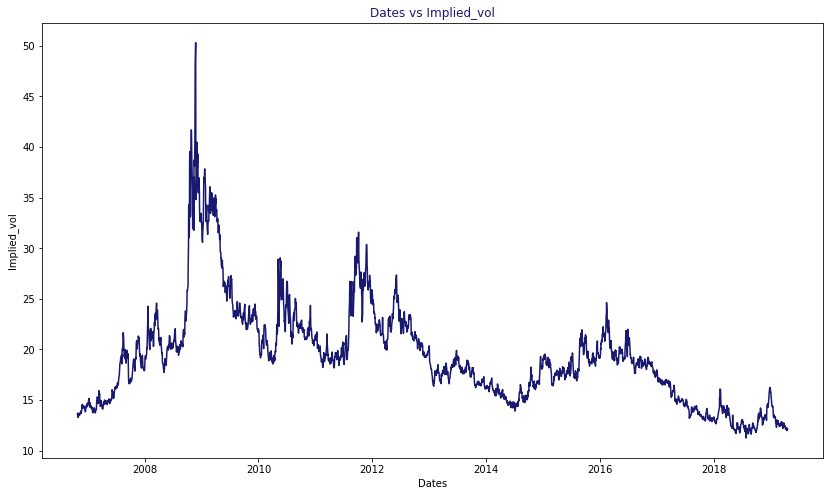

Strike = 110, Duration = 18M


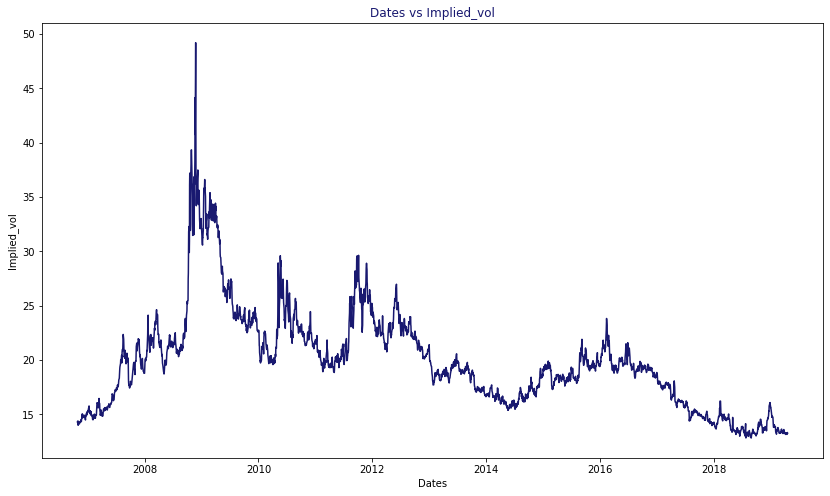

Strike = 110, Duration = 2Y


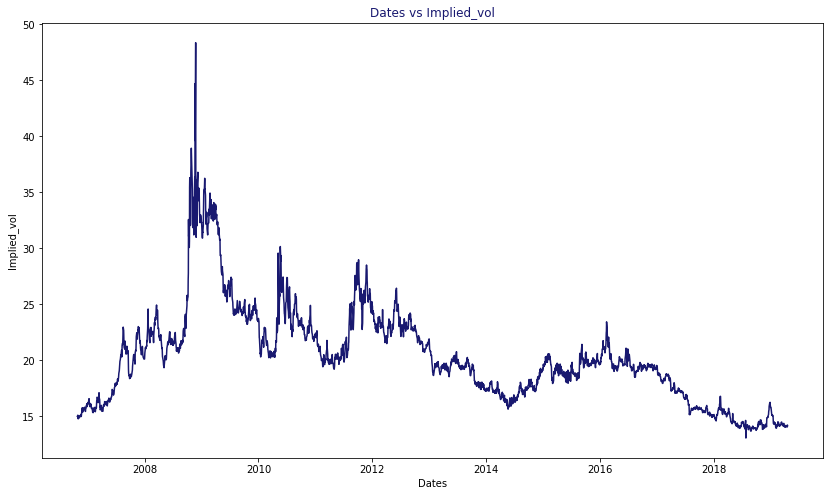

Strike = 110, Duration = 3Y


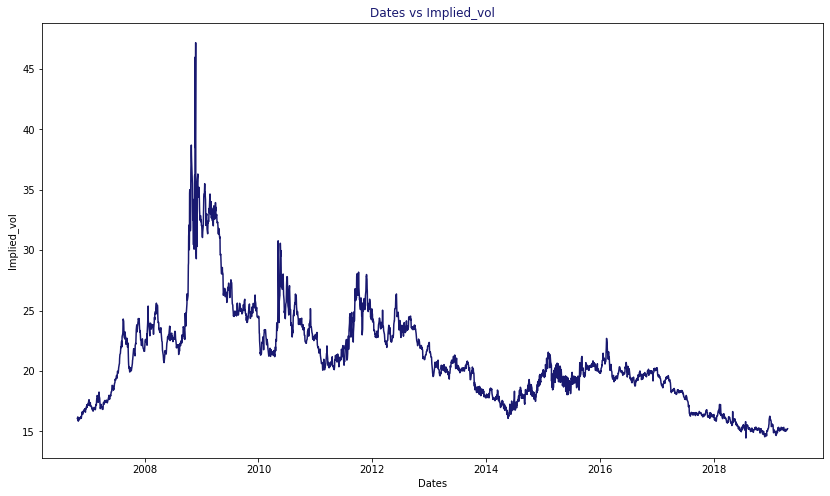

Strike = 120, Duration = 6M


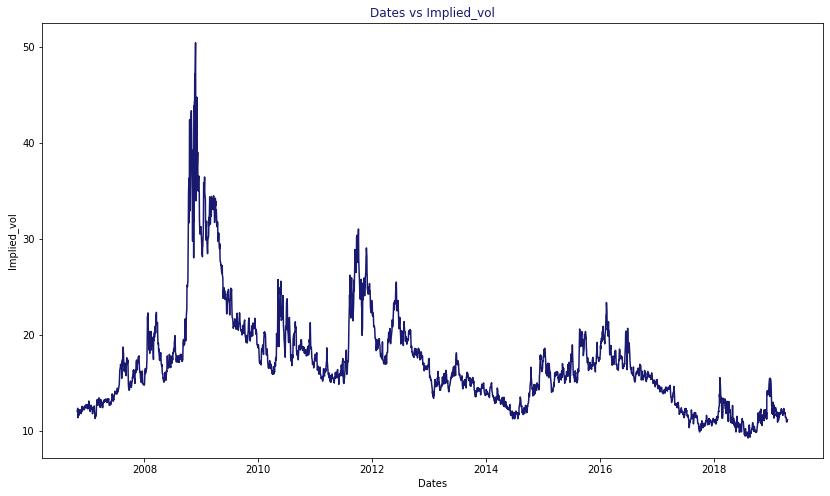

Strike = 120, Duration = 1Y


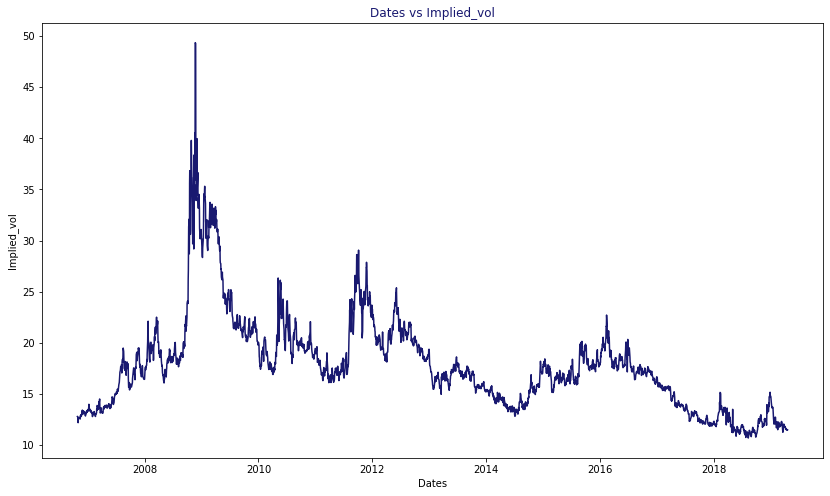

Strike = 120, Duration = 18M


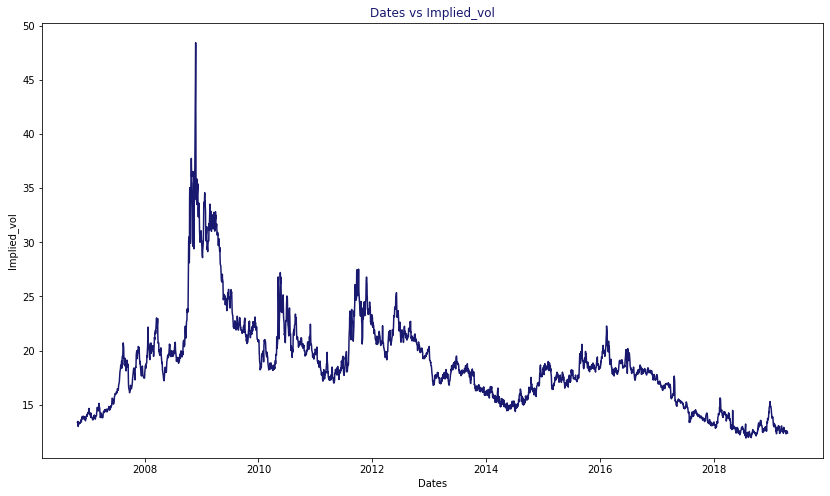

Strike = 120, Duration = 2Y


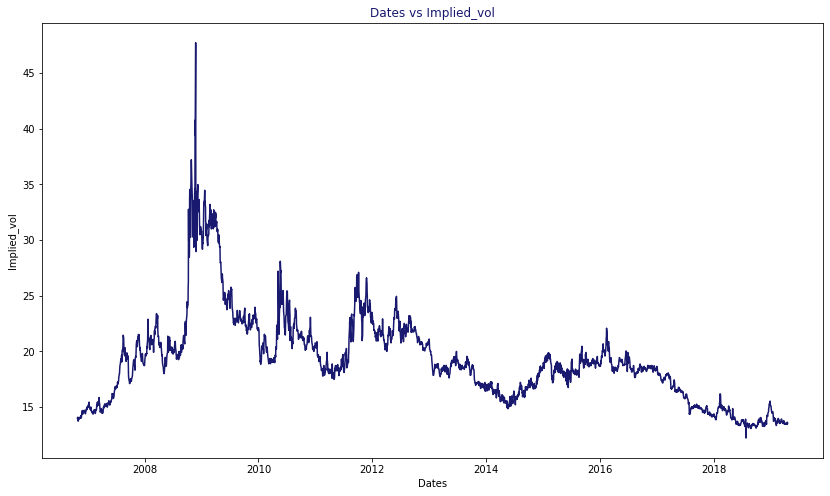

Strike = 120, Duration = 3Y


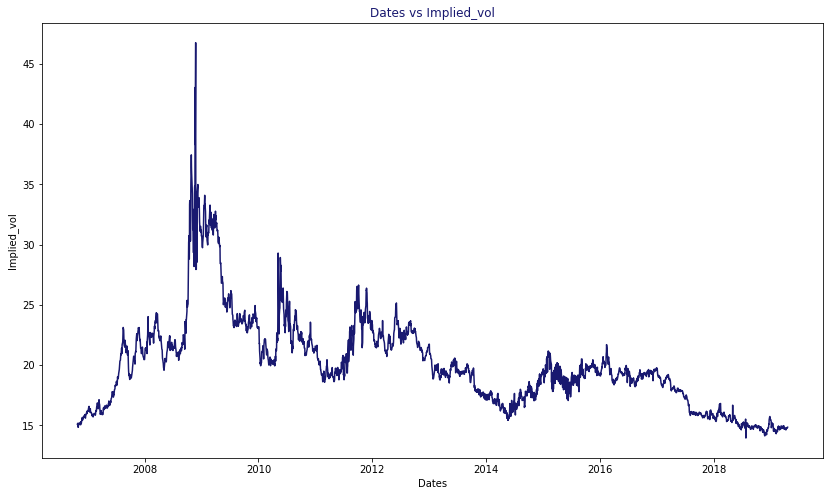

In [73]:
from implied_vol_prediction.src.graphs import graph_df_strike_duration_selection

for s in strikes: 
    for d in durations: 
        if not((d == "3Y") and (s == 140)): 
            graph_df_strike_duration_selection(sx5e_daily, d, s, "Dates", "Implied_vol")

## Plot same maturity options with different strike values, spots_iv_index_spx_ai_daily

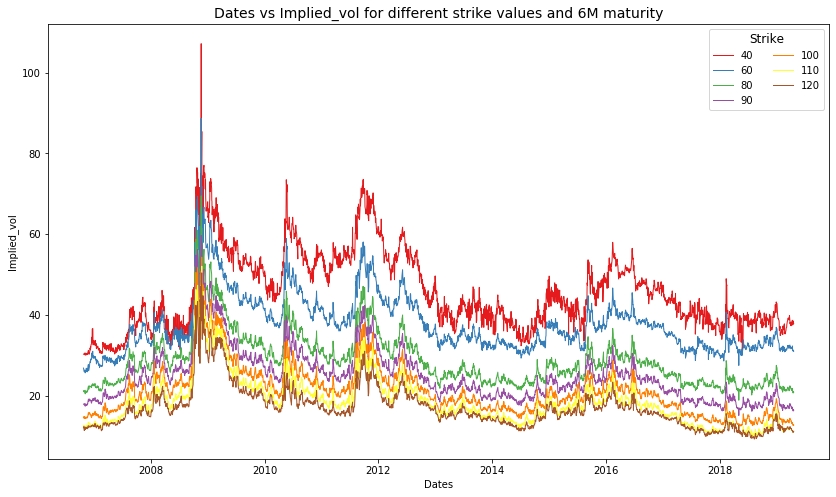

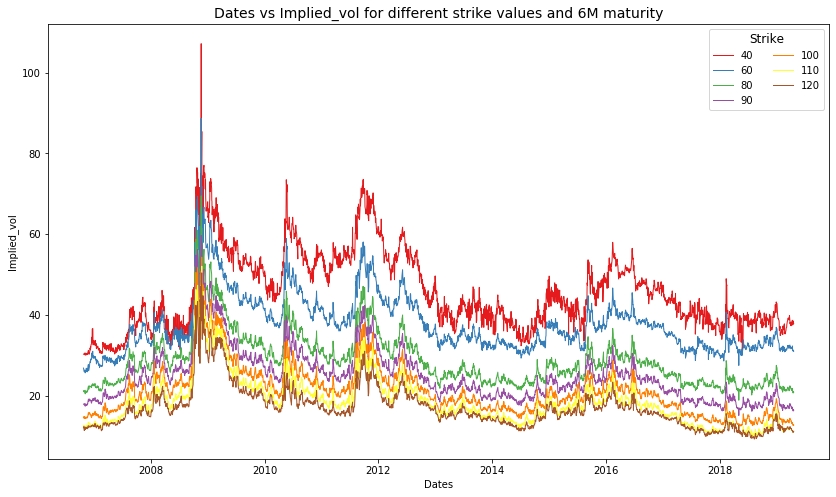

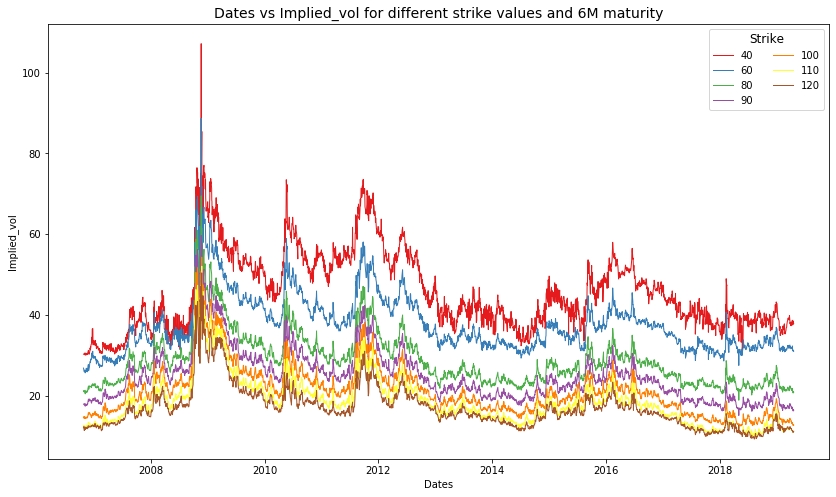

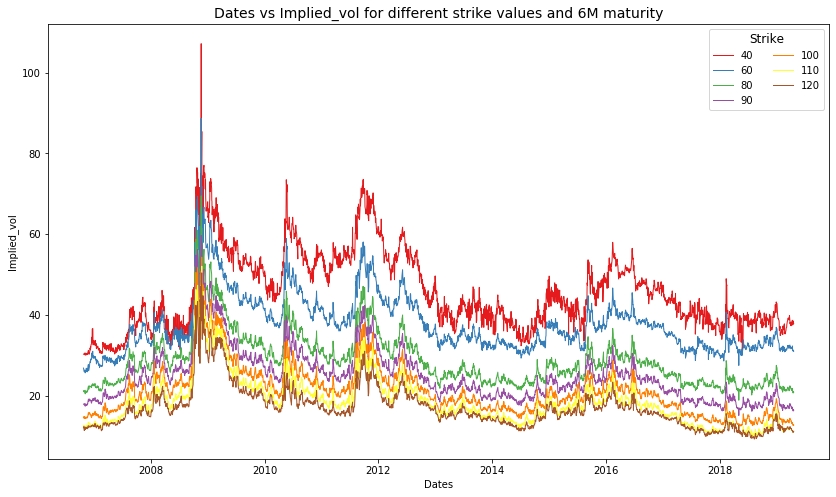

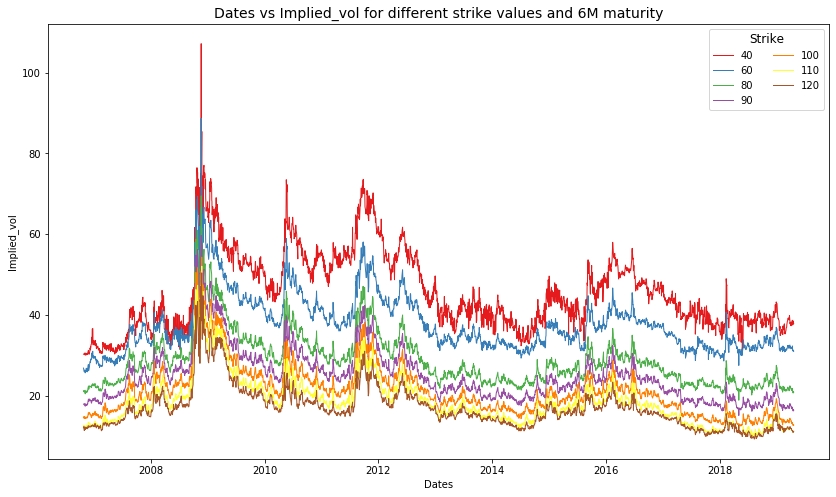

In [79]:
from implied_vol_prediction.src.graphs import plot_different_strike_values, plot_different_duration_values

for d in ["6M", "1Y", "18M", "2Y", "3Y"]: 
    plot_different_strike_values(sx5e_daily, "6M", "Dates", "Implied_vol")

## Plot same strike options with different maturities values, spots_iv_index_spx_ai_daily

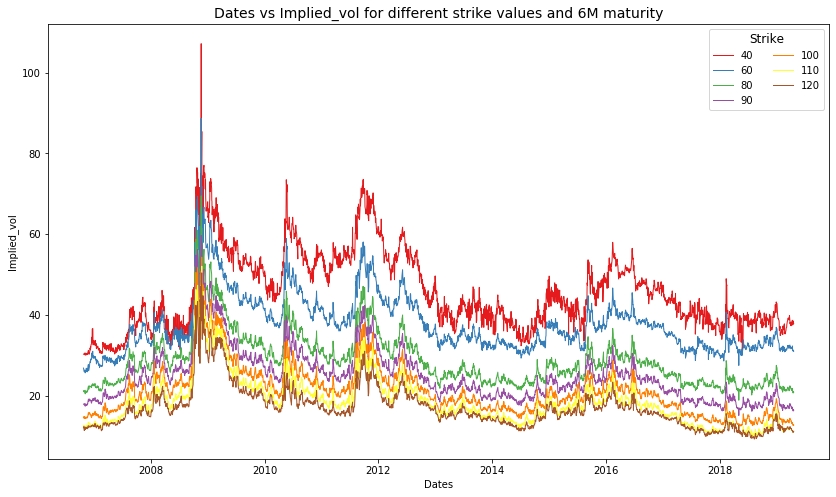

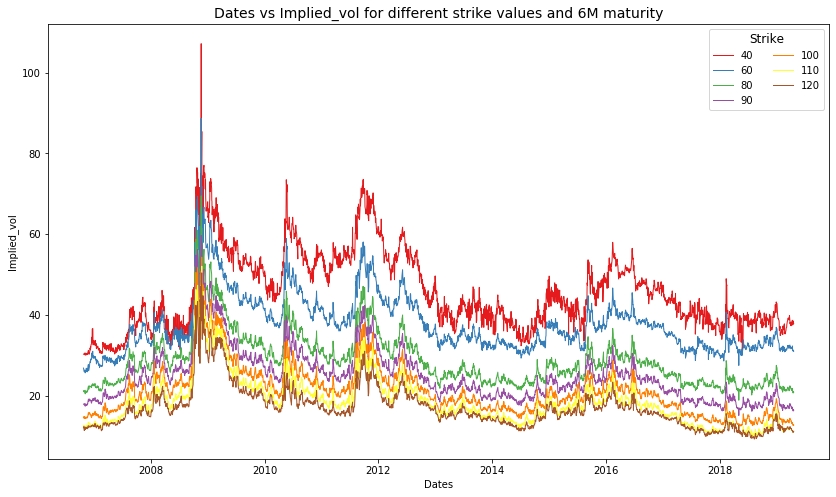

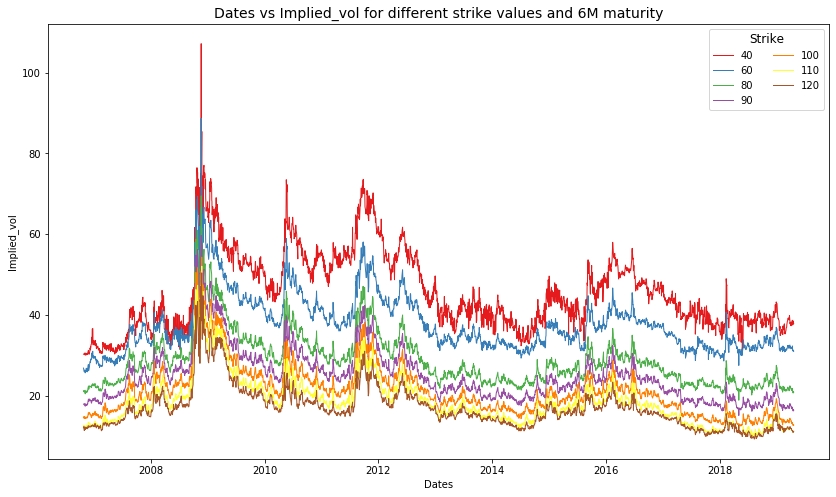

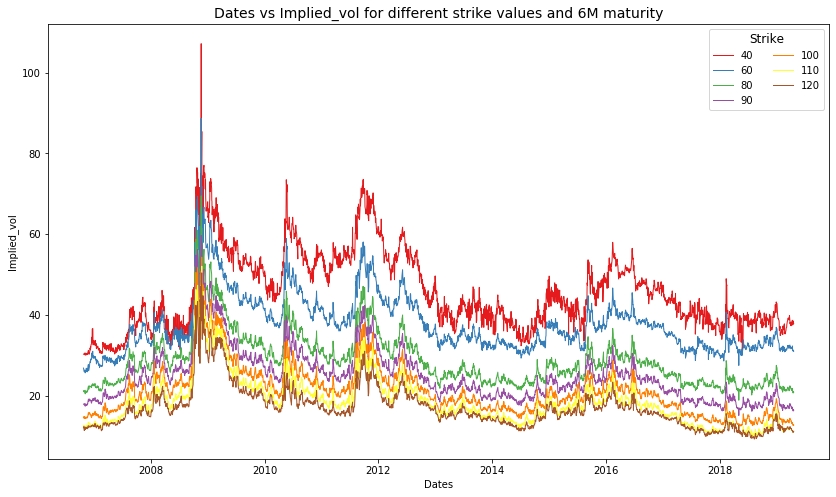

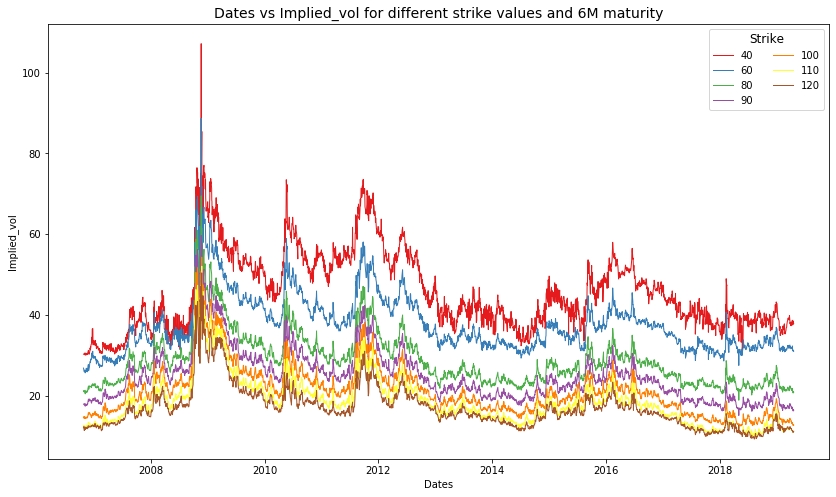

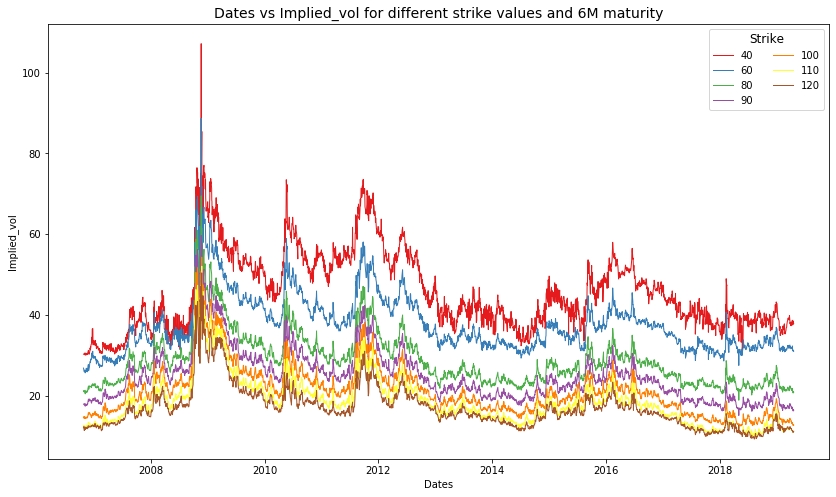

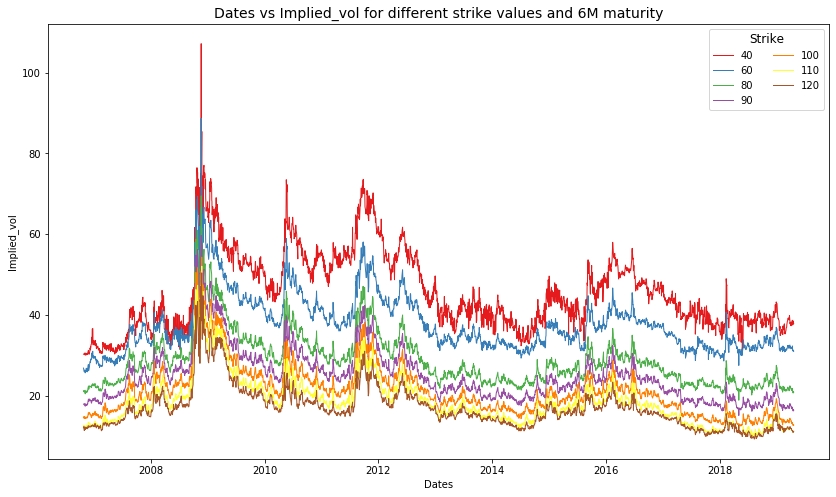

In [80]:
for d in strikes: 
    plot_different_strike_values(sx5e_daily, "6M", "Dates", "Implied_vol")

# Cross correlation tables 
## 1) Pearson correlation
Correlation / SD of each option 

In [33]:
sx5e_daily.head()

Dates   Spot t  Spot t-1  Implied_vol Duration  Strike  \
0 2019-04-18  3477.73   3477.73      39.7231       6M      30   
1 2019-04-17  3477.73   3463.36      39.7774       6M      30   
2 2019-04-16  3463.36   3450.46      40.2187       6M      30   
3 2019-04-15  3450.46   3447.83      39.5568       6M      30   
4 2019-04-12  3447.83   3435.34      39.4741       6M      30   

   Real_implied_vol  
0         11.177800  
1         11.186432  
2         10.952175  
3         11.050433  
4         10.942030

In [82]:
from implied_vol_prediction.src.data_analysis import create_corr_table

pearson_corr_table = create_corr_table(sx5e_daily)

In [83]:
pearson_corr_table[(pearson_corr_table["Pearson correlation"] >= 0.8)].sort_values(by=['Pearson correlation'], 
                                                                                   ascending=False)

Duration1  Strike1 Duration2  Strike2  Pearson correlation
248       18M       90        2Y       90             0.997306
277       18M      100        2Y      100             0.997007
219       18M       80        2Y       80             0.996947
270       18M      100        1Y      100             0.996444
299       18M      110        1Y      110             0.996366
..        ...      ...       ...      ...                  ...
13         1Y       40        2Y      120             0.806628
6          1Y       40        6M      120             0.805716
427        2Y      120        6M       40             0.802886
16         1Y       40        3Y       80             0.801858
455        3Y       80        6M       40             0.800282

[482 rows x 5 columns]

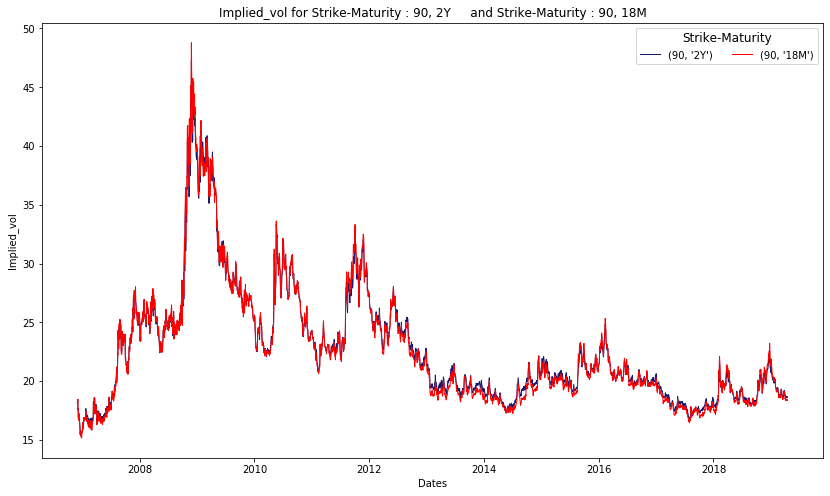

In [86]:
from implied_vol_prediction.src.graphs import double_graph

double_graph(spots_iv_index_spx_ai_daily, "2Y", 90, "18M", 90, "Dates", "Implied_vol")

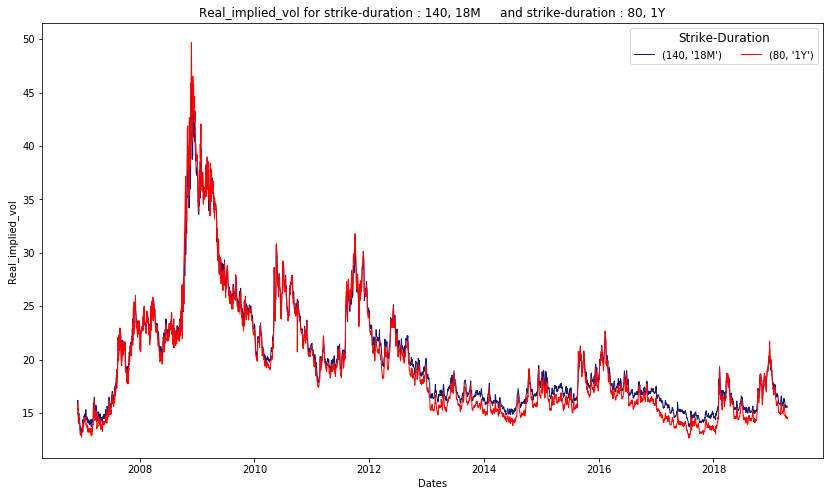

In [124]:
double_graph(spots_iv_index_spx_ai_daily, "18", 90, "18M", 90, "Dates", "Implied_vol")